In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import floor, ceil
from pylab import rcParams

%matplotlib inline

In [2]:
sns.set(style='ticks', palette='Spectral', font_scale=1.5)

material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
sns.set_palette(material_palette)
rcParams['figure.figsize'] = 16, 8

plt.xkcd();
random_state = 42
np.random.seed(random_state)
tf.set_random_seed(random_state)

In [3]:
math_df = pd.read_csv("student-mat.csv", sep=",")
port_df = pd.read_csv("student-por.csv", sep=",")

math_df["course"] = "math"
port_df["course"] = "portuguese"

merged_df = math_df.append(port_df)
#merged_df=math_df
#merged_df[0:1]
#print(math_df[2:3])
#students_df[0:1]
#print(merged_df.school)

In [4]:
students_df=merged_df
students_df = students_df.sample(frac=1)
students_df['alcohol'] = (students_df.Walc * 2 + students_df.Dalc * 5) / 7
students_df['alcohol'] = students_df.alcohol.map(lambda x: ceil(x))
students_df['drinker'] = students_df.alcohol.map(lambda x: "yes" if x > 2 else "no")
#print(students_df['drinker'])

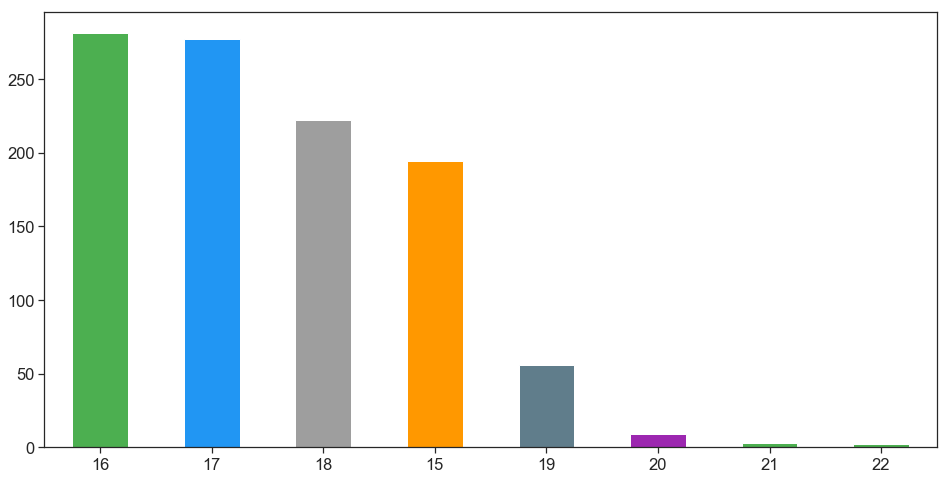

In [5]:
students_df.age.value_counts().plot(kind="bar", rot=0);

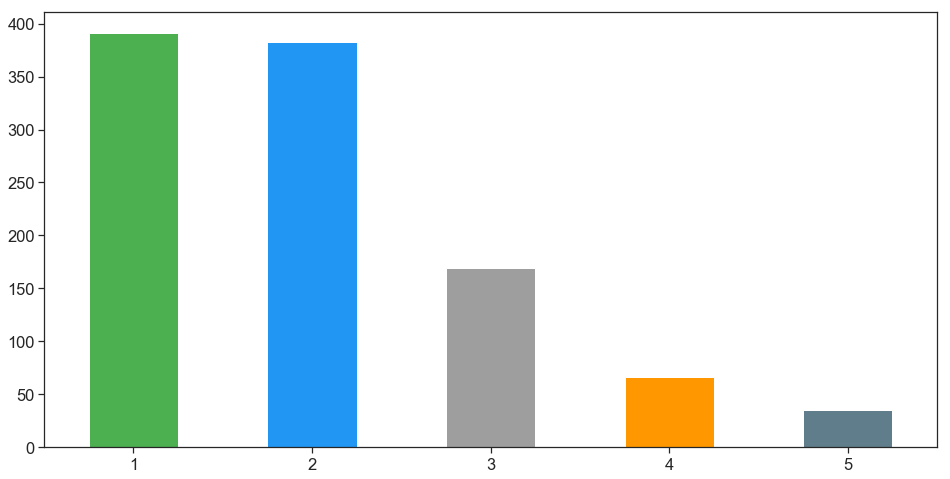

In [9]:
students_df.alcohol.value_counts().plot(kind="bar", rot=0);

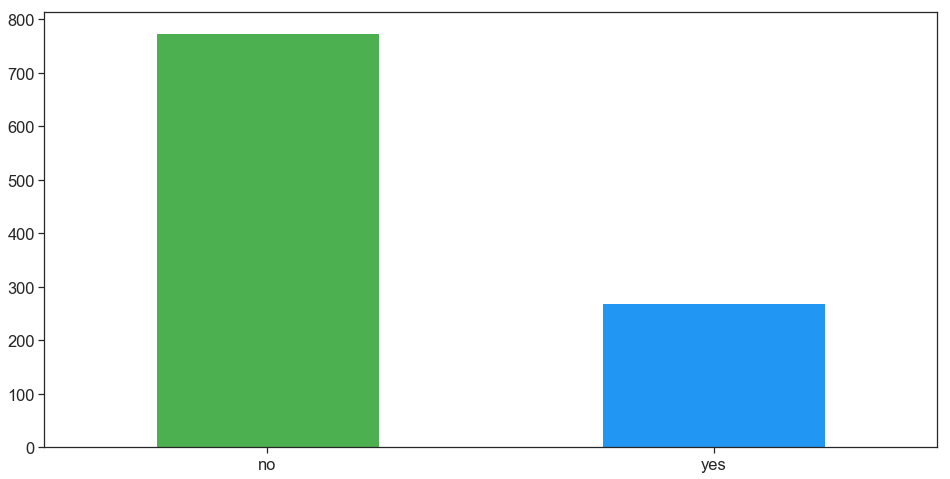

In [10]:
students_df.drinker.value_counts().plot(kind="bar", rot=0);

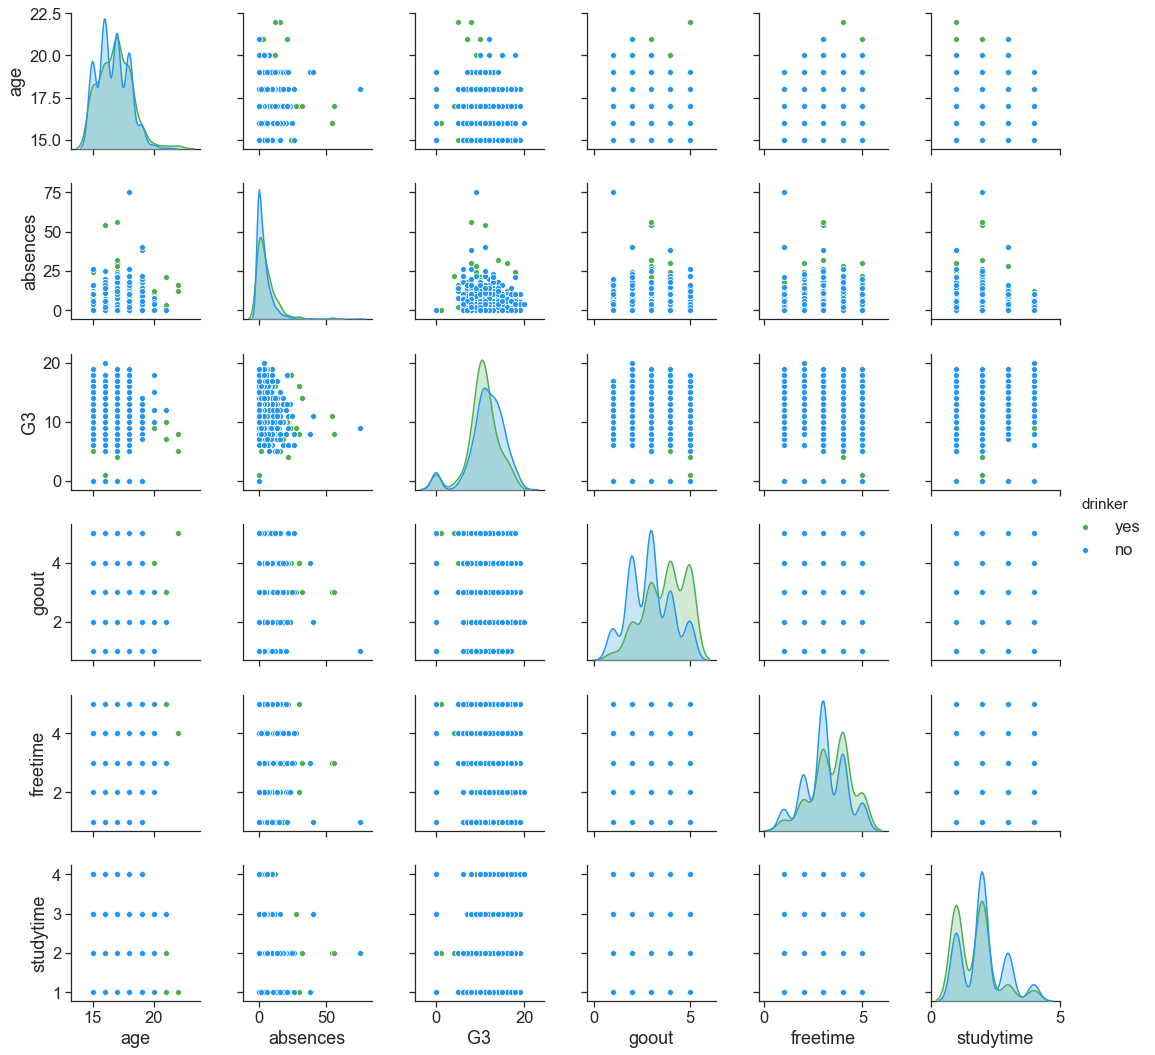

In [11]:
sns.pairplot(students_df[['age', 'absences', 'G3', 'goout', 'freetime', 'studytime','drinker']], hue='drinker');


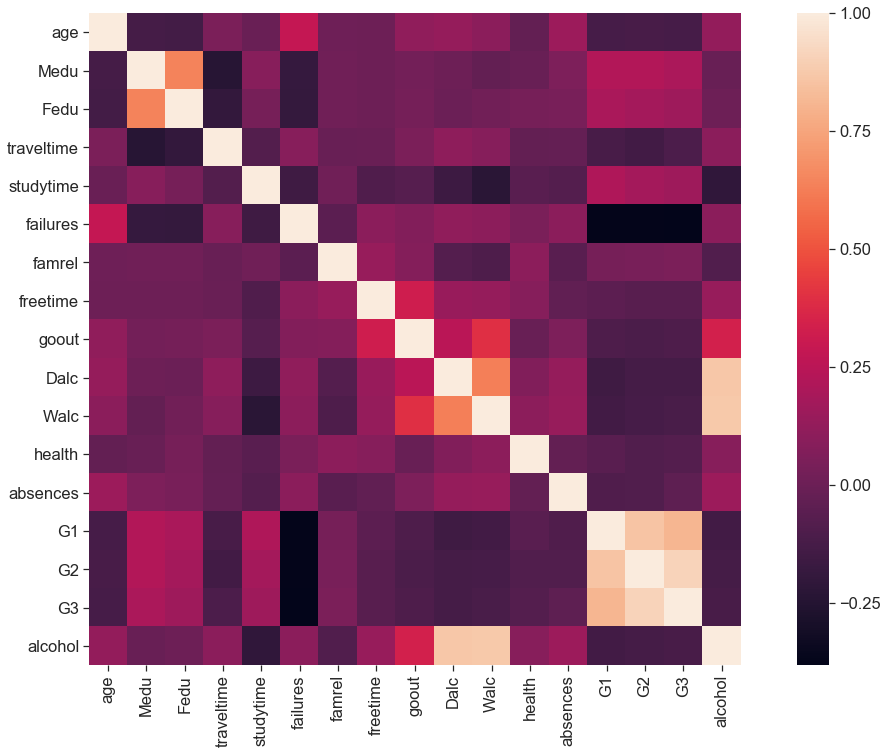

In [12]:

corr_mat = students_df.corr() 
fig, ax = plt.subplots(figsize=(20, 12)) 
sns.heatmap(corr_mat, vmax=1.0, square=True, ax=ax);

In [27]:
def encode(series): 
  return pd.get_dummies(series.astype(str))

In [28]:
train_x = pd.get_dummies(students_df.school)
train_x['age'] = students_df.age

train_x['absences'] = students_df.absences
train_x['g1'] = students_df.G1
train_x['g2'] = students_df.G2
train_x['g3'] = students_df.G3
train_x = pd.concat([train_x, encode(students_df.sex), encode(students_df.Pstatus), 
                     encode(students_df.Medu), encode(students_df.Fedu),
                     encode(students_df.guardian), encode(students_df.studytime),
                     encode(students_df.failures), encode(students_df.activities),
                     encode(students_df.higher), encode(students_df.romantic),
                     encode(students_df.reason), encode(students_df.paid),
                     encode(students_df.goout), encode(students_df.health),
                     encode(students_df.famsize), encode(students_df.course)
                    ], axis=1)
print(train_x)
train_y = encode(students_df.drinker)

     GP  MS  age  absences  g1  g2  g3  F  M  A     ...      5  1  2  3  4  5  \
576   0   1   18         8   9  10  11  0  1  0     ...      1  0  0  0  0  1   
280   1   0   17        30   8   8   8  0  1  1     ...      0  0  0  0  0  1   
141   1   0   16         0  14  13  13  1  0  0     ...      0  0  0  1  0  0   
429   0   1   16         5  10  11  11  0  1  1     ...      0  0  1  0  0  0   
249   1   0   16         0  12  12  12  0  1  0     ...      0  0  1  0  0  0   
382   1   0   17         2  11  12  11  1  0  0     ...      1  0  0  0  0  1   
583   0   1   18         0   8   6   0  1  0  0     ...      1  0  0  1  0  0   
231   1   0   17         4  11  11  11  0  1  0     ...      0  1  0  0  0  0   
265   1   0   17         4  15  14  15  1  0  0     ...      0  0  0  0  0  1   
153   1   0   15         2  13  13  13  1  0  0     ...      0  0  0  0  0  1   
346   1   0   18         9  16  15  16  0  1  0     ...      0  0  0  0  1  0   
168   1   0   16         0  

In [30]:
train_size = 0.9

train_cnt = floor(train_x.shape[0] * train_size)
x_train = train_x.iloc[0:train_cnt].values
num_epochs = 100
all_scores = []
y_train = train_y.iloc[0:train_cnt].values
x_test = train_x.iloc[train_cnt:].values
y_test = train_y.iloc[train_cnt:].values

In [39]:
import numpy as np
k=4
num_val_samples = len(train_x) // k
num_epochs = 100
all_scores = []
bach_size=10

In [43]:

from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_x.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(train_y.shape[1]))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [44]:
k=1
model = build_model()
model.fit(train_x,train_y,epochs=num_epochs, batch_size=1, verbose=1)
val_mse, val_mae = model.evaluate(x_test,y_test, verbose=1)
all_scores.append(val_mae)

Epoch 1/100
1044/1044 [==============================] - 7s 6ms/step - loss: 0.3782 - mean_absolute_error: 0.4780
Epoch 2/100
1044/1044 [==============================] - 6s 5ms/step - loss: 0.2304 - mean_absolute_error: 0.3756
Epoch 3/100
1044/1044 [==============================] - 6s 6ms/step - loss: 0.1949 - mean_absolute_error: 0.3481A: 
Epoch 4/100
1044/1044 [==============================] - 6s 6ms/step - loss: 0.1763 - mean_absolute_error: 0.3214
Epoch 5/100
1044/1044 [==============================] - 10s 9ms/step - loss: 0.1701 - mean_absolute_error: 0.3137: 4s - loss:
Epoch 6/100
1044/1044 [==============================] - 6s 6ms/step - loss: 0.1602 - mean_absolute_error: 0.3008
Epoch 7/100
1044/1044 [==============================] - 7s 7ms/step - loss: 0.1579 - mean_absolute_error: 0.3000
Epoch 8/100
1044/1044 [==============================] - 10s 10ms/step - loss: 0.1537 - mean_absolute_error: 0.2941 1s - loss: 0
Epoch 9/100
1044/1044 [==============================] - 

1044/1044 [==============================] - 5s 4ms/step - loss: 0.0731 - mean_absolute_error: 0.2026
Epoch 69/100
1044/1044 [==============================] - 5s 4ms/step - loss: 0.0722 - mean_absolute_error: 0.2012
Epoch 70/100
1044/1044 [==============================] - 5s 4ms/step - loss: 0.0678 - mean_absolute_error: 0.1953
Epoch 71/100
1044/1044 [==============================] - 5s 4ms/step - loss: 0.0691 - mean_absolute_error: 0.1950
Epoch 72/100
1044/1044 [==============================] - 5s 4ms/step - loss: 0.0683 - mean_absolute_error: 0.1982
Epoch 73/100
1044/1044 [==============================] - 5s 4ms/step - loss: 0.0641 - mean_absolute_error: 0.1925
Epoch 74/100
1044/1044 [==============================] - 5s 4ms/step - loss: 0.0644 - mean_absolute_error: 0.1931
Epoch 75/100
1044/1044 [==============================] - 5s 4ms/step - loss: 0.0602 - mean_absolute_error: 0.1883
Epoch 76/100
1044/1044 [==============================] - 5s 4ms/step - loss: 0.0611 - mean_a

In [16]:
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [17]:
n_hidden_1 = 38
n_input = train_x.shape[1]
n_classes = train_y.shape[1]

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [18]:
training_epochs = 5000
display_step = 1000
batch_size = 32

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [19]:
predictions = multilayer_perceptron(x, weights, biases, keep_prob)
print(predictions)

Tensor("add:0", shape=(?, 2), dtype=float32)


In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [21]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)


In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(len(x_train) / batch_size)
        x_batches = np.array_split(x_train, total_batch)
        y_batches = np.array_split(y_train, total_batch)
        for i in range(total_batch):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: 0.8
                            })
            avg_cost += c / total_batch
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: x_test, y: y_test, keep_prob: 1.0}))

Epoch: 0001 cost= 96.835765181
Epoch: 1001 cost= 0.557198175
Epoch: 2001 cost= 0.348862121
Epoch: 3001 cost= 0.263232793
Epoch: 4001 cost= 0.253047477
Optimization Finished!
Accuracy: 0.75238097


In [21]:
predict = multilayer_perceptron(x, w, b, keep_prob)
pred = tf.argmax(predictions, 1)
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  c,pred= sess.run([predict,pred], 
                            feed_dict={
                                x: x_train[50:110],  
                                keep_prob: 0.8
                            })
  

print(pred,np.argmax(y_train[50:110],1))

NameError: name 'w' is not defined

In [24]:
merge_vector = ["school","sex","age","address",
                "famsize","Pstatus","Medu","Fedu",
                "Mjob","Fjob","reason","nursery","internet"]

duplicated_mask = merged_df.duplicated(keep=False, subset=merge_vector)
duplicated_df = merged_df[duplicated_mask]
unique_df = merged_df[~duplicated_mask]
both_courses_mask = duplicated_df.duplicated(subset=merge_vector)
both_courses_df = duplicated_df[~both_courses_mask].copy()
both_courses_df["course"] = "both"
students_df = unique_df.append(both_courses_df)

In [25]:
df = pd.DataFrame({'A': range(3), 'B': [2*i for i in range(3)]})
df.loc[0,'B']=1
#df.loc[2,'B']=4.6
#df.loc[3,'B']=0.6
print(df)
#print(df.mean())
a=(df['A']-df.mean()['A'])
b=(df['B']-df.mean()['B'])
c=(a*b)
print(c)
print(df.cov())
d=(df.std()['A']*df.std()['B'])
#print(d)
#print(df.std())

   A  B
0  0  1
1  1  2
2  2  4
0    1.333333
1   -0.000000
2    1.666667
dtype: float64
     A         B
A  1.0  1.500000
B  1.5  2.333333


In [172]:
# Import `tensorflow` 
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([[1,1],[1,1]])
x2 = tf.constant([[1],[1]])

# Multiply
result = tf.matmul(x1, x2)

# Intialize the Session
with tf.Session() as sess:

# Print the result
    out=sess.run(result)
    print(out)

# Close the session
sess.close()

[[2]
 [2]]
